# For Text Mining assignment
 
 # ONE:
# 1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)


In [1]:
!pip install spacy
!pip install wordcloud
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud # to create a box of words
%matplotlib inline   

In [2]:
 !python -m spacy download en_core_web_sm 

Traceback (most recent call last):
  File "C:\Users\Shivani\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\Shivani\anaconda3\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\Shivani\anaconda3\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Shivani\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\Shivani\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 386, in _make_r

In [3]:
musk = pd.read_csv('Elon_musk.csv', encoding='unicode escape')
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
musk.drop(['Unnamed: 0'], inplace=True, axis=1)
musk

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
musk = [Text.strip() for Text in musk.Text] # remove both the leading and the trailing characters
musk = [Text for Text in musk if Text] # removes empty strings, because they are considered in Python as False

In [6]:
# Joining the list into one string/text
cleaned_tweets = ' '.join(musk)
len(cleaned_tweets)

158702

In [7]:
#Punctuation
no_punc_text = cleaned_tweets.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [8]:
import re
cleaned_tweets1=re.sub(r'http\S+', '', no_punc_text)
cleaned_tweets1[0:1000]

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [9]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(cleaned_tweets1)
print(text_tokens[0:100])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting']


In [10]:
len(text_tokens)

20423

In [11]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself']


In [12]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely']


In [13]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:100])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'cr

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:100])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest geoffkeighley UnrealEngine Its getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha freewalletorg Any crypto


In [16]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'just', 'send', 'just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'get', 'real', 'buy', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'JoshManMode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001F923', 'this', 'tr

# Feature Extaction
# Using CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [19]:
print(vectorizer.vocabulary_)

{'kunalb11': 2051, 'alien': 231, 'idaacarmack': 1788, 'ray': 2970, 'trace': 3847, 'cyberpunk': 961, 'hdr': 1676, 'nextlevel': 2506, 'have': 1670, 'try': 3882, 'joerogan': 1971, 'spotify': 3465, 'great': 1608, 'interview': 1899, 'gtera27': 1627, 'doge': 1114, 'underestimate': 4015, 'teslacn': 3692, 'congratulations': 855, 'tesla': 3686, 'china': 739, 'amazing': 257, 'execution': 1325, 'last': 2070, 'year': 4288, 'now': 2546, 'next': 2505, 'even': 1297, 'happy': 1657, 'new': 2502, 'ox': 2663, 'frodo': 1493, 'underdoge': 4014, 'all': 234, 'thought': 3771, 'would': 4263, 'fail': 1361, 'himself': 1722, 'owensparks': 2660, 'flcnhvy': 1435, 'anonyx10': 286, 'haha': 1642, 'thanks': 3730, 'indeed': 1837, 'tweets': 3905, 'definitely': 1016, 'represent': 3052, 'realworld': 2995, 'time': 3790, 'allocation': 236, 'the': 3737, 'entertaining': 1253, 'outcome': 2640, 'likely': 2132, 'givedirectly': 1578, 'just': 1998, 'send': 3238, 'agree': 200, 'clubhouse': 781, 'kanyewest': 2008, 'geoffkeighley': 15

In [20]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['23', '230', '24', '240am', '247teslanew', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewe', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Shivani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
print(X.toarray().shape)

(15123, 4321)


# CountVectorizer with N-grams

In [24]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(musk)

In [25]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


# Wordcloud

In [26]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

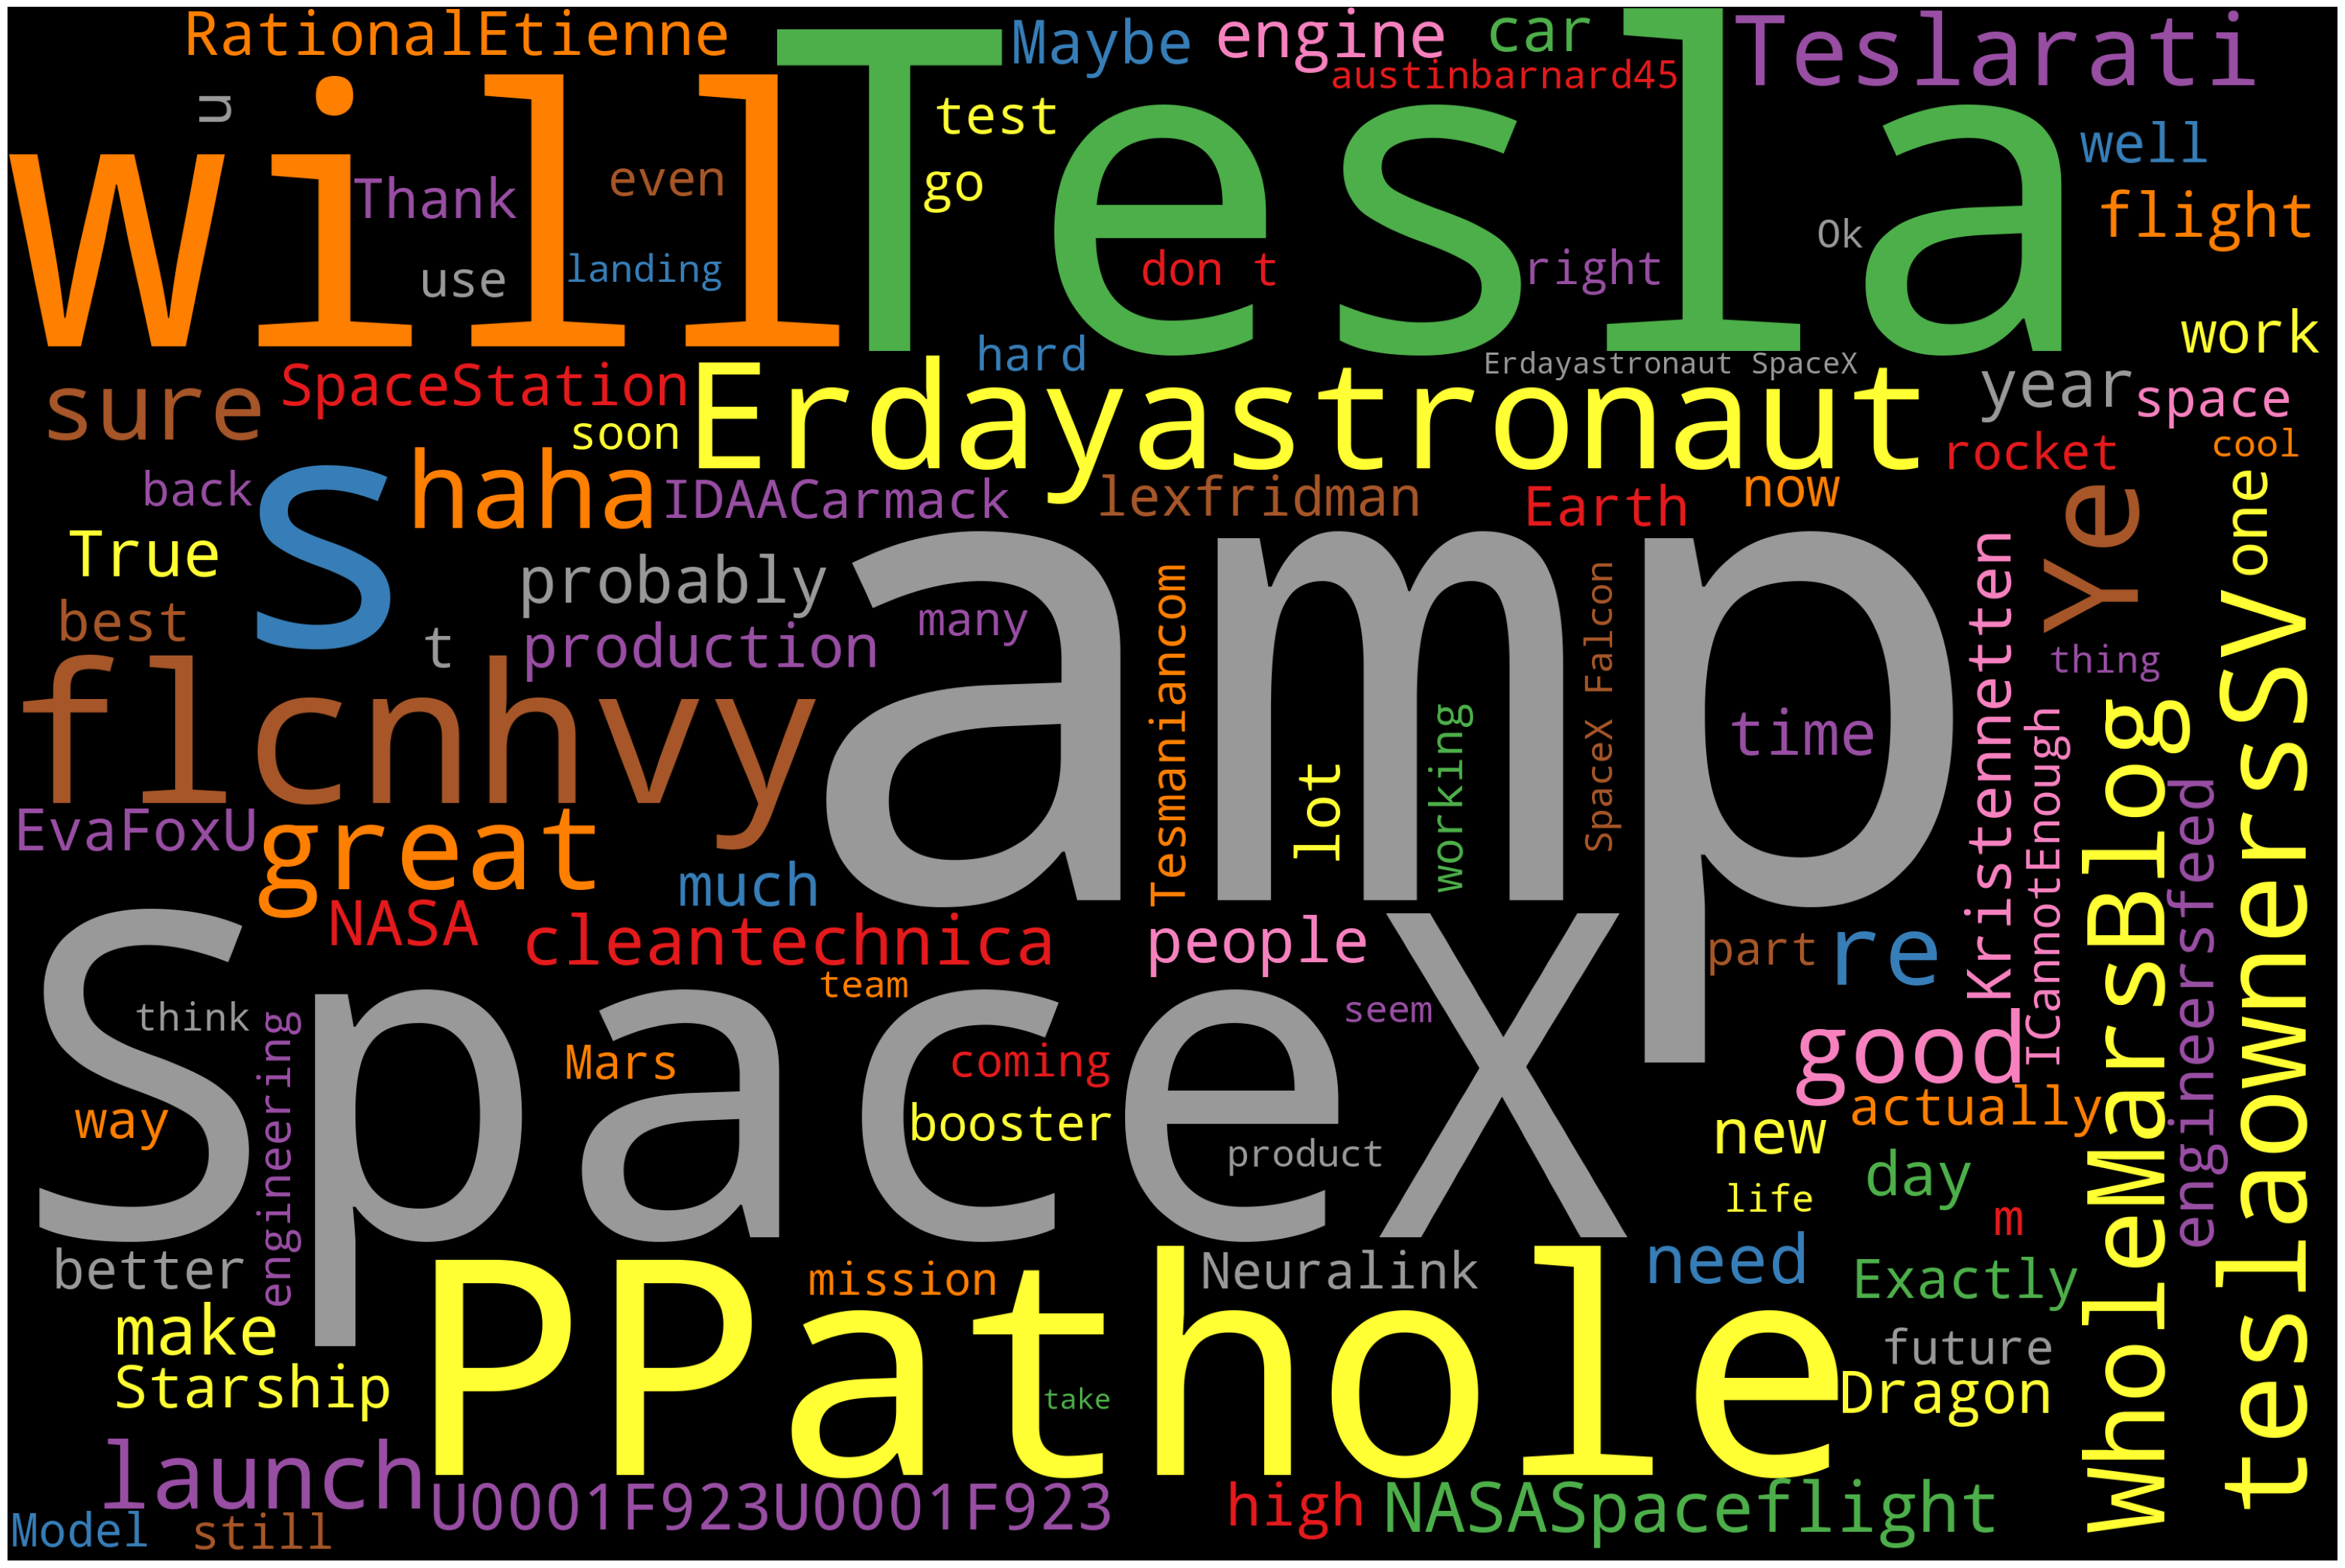

In [28]:
# Generate wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,
                      colormap='Set1',stopwords=stopwords).generate(cleaned_tweets1)
# Plot
plot_cloud(wordcloud)

In [29]:
nlp=spacy.load('en_core_web_sm')

one_block=cleaned_tweets1
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [30]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

kanyewest PROPN
  SPACE
geoffkeighley PROPN
UnrealEngine PROPN
Its PROPN
getting VERB
real ADJ
Bought VERB
some DET
Dogecoin PROPN
for ADP
lil NOUN
X PROPN
so SCONJ
he PRON
can AUX
be AUX
a DET
toddler NOUN
hodler NOUN
JoshManMode PROPN
He PRON
definitely ADV
has VERB
issues NOUN
but CCONJ
the DET
sentencing NOUN
seems VERB
a DET
bit NOUN
high ADJ
freewalletorg NOUN
Thanks NOUN
for ADP
fixing VERB
freewalletorg NOUN
Please INTJ
unlock VERB
my PRON
account NOUN
AstroJordy PROPN
U0001F923U0001F923 PROPN
This PRON
is AUX
true ADJ
power NOUN
haha PROPN
  SPACE
freewalletorg NOUN
Any DET
crypto ADJ
wallet NOUN
that SCONJ
wont NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN
freewalletorg VERB
Your PRON
app NOUN
sucks VERB
RT PROPN
SpaceX PROPN
NASA PROPN
has AUX
selected VERB
Falcon PROPN
Heavy PROPN
to PART
launch VERB
the DET
first ADJ
two NUM
elements NOUN
of ADP
the DET
lunar ADJ
Gateway NOUN
together ADV
on ADP
one NUM
m

In [31]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['fixed', 'coins', 'unit', 'time', 'kevinmgill', 'michaelhodapp', 'launch', 'tower', 'stack', 'Raptors', 'orbit', 'booster', 'ship', 'amp', 'booster', 'mass', 'michaelhodapp', 'work', 'tonight', 'video', 'people', 'spoken', 'lexfridman', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'amp', 'pain', 'let', 'rainforests', 'come', 'itsALLrisky', 'genesimmons', 'simplicity', 'genius', 'astrogdogg', 'wapodavenport', 'decades', 'work', 'Have', 'look', 'notes', 'emails', 'texts', 'learned', 'tell', 'story', 'amp', 'read', 'heard', 'name', 'years', 'That\x92s', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'currency', 'redlineshifter', 'scratch', 'wonderofscience', 'said', 'ship', 'landing', 'burn', 'has', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'thrusters', 'seem', 'Raptors', 'have', 'mu', 'launch', 'mission', 'collect', 'data', 'galaxies', 'explore', 'launches', 'satellites', 'orbit', 'mission', 'pad', 'deck', 'mikko', 'default', 'engine', 'lever', 'arm', 'shu

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,amp,96
1,have,49
2,flcnhvy,45
3,launch,42
4,make,33
5,people,31
6,need,31
7,engineersfeed,29
8,year,28
9,production,27


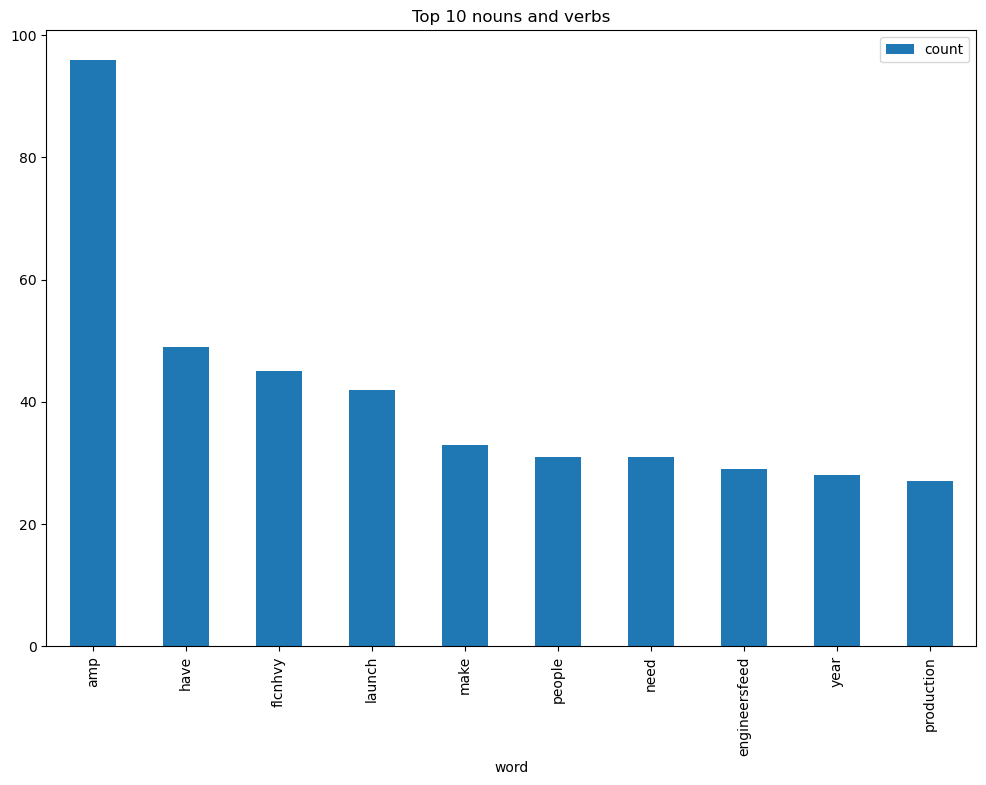

In [33]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [35]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(musk))
sentences[0:100]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [36]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [37]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

# TWO:
# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining

In [39]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [40]:
#creating an empty review list
iphone_reviews = []

In [41]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [42]:
##Writing reviews in a text file
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [43]:
import os
os.getcwd()

'C:\\Users\\Shivani'

In [44]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(iphone_reviews)

In [46]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)
red_rev_string

' best iphone i ve ever used is this one as it is a perfect fit to anyone s hands and slimmer than any other phone the camera quality is as good as your digital cameras while we shoot videos on k with fps as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s which looks square and it feels good in the hand it feels better than the sleek bezel of the iphone x especially the mm thickness with right angles the border is particularly stylish the camera is awesome the night view mode turns on automatically and the imaging effect is really good video stabilization is also good the filter mode is quite good many android phones are still many miles away from these tones even though there are good imitations apple was able to improve its tones image quality is perfect and there is little or no noise even in a low light environment signal nothing to say it is much better in iphone pro wifi also consthere is a problem with the hand handling of 

In [47]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")

In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [49]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [50]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

In [51]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

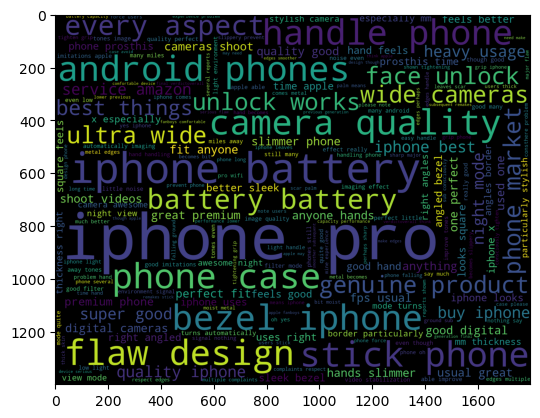

In [52]:
plt.imshow(wordcloud_ip)

In [54]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [55]:
negwords =negwords[37:]

In [56]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in red_rev_words if w in negwords])

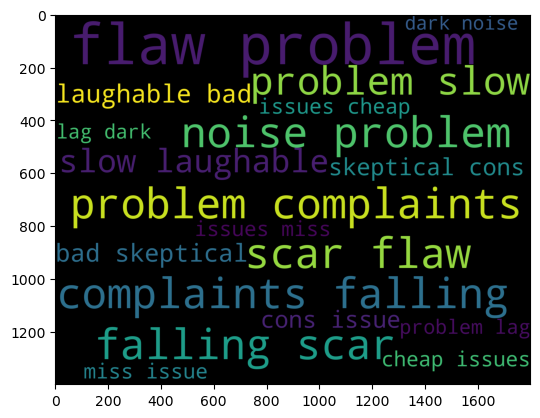

In [57]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [58]:
##Unique words
red_unique = list(set(" ".join(iphone_reviews).split(" ")))
red_unique

['',
 'feels',
 '6GB',
 'impact',
 'equally',
 'smartphone',
 'seen',
 'sharp.',
 'thank',
 '12',
 'especially',
 'expected',
 'or',
 'through',
 'Pro',
 'Night',
 'life',
 'cheap',
 'it!!So',
 'minus.',
 'highly',
 'well',
 '(32GB)',
 'perfect.The',
 'was',
 'become',
 'metal',
 'palm.',
 'appliances,',
 'tell',
 'uses',
 'hand-handling',
 'remakes.',
 'many',
 'look.Awesome',
 'perfect',
 'surfing,',
 'to',
 '(11:50)',
 'r',
 'chip',
 'bit!!',
 '&',
 'an',
 'very',
 'lens',
 'update)I',
 'i12Pro',
 'feel',
 'longer',
 'photos',
 'device.',
 'Camera',
 'view',
 'mask',
 'handle,',
 'years',
 'fine',
 'first',
 'this',
 'mark',
 'enough',
 'excellent',
 'can',
 'ever.',
 'battery',
 'case.',
 'low-light',
 'here',
 'since',
 'passcode',
 'hanging.The',
 'able',
 'smartphone,as',
 'masks',
 'prevent',
 'trying',
 'comes',
 'which',
 'force',
 '.ProsThis',
 'premium',
 'IOS',
 'respect',
 'software',
 'environment',
 'good!!\n',
 'sending',
 'wide',
 'miss',
 'smaller',
 'give',
 'would'

# Emotion Mining

In [59]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [62]:
afinn.head(10)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [63]:
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

['The night view mode turns on automatically, and the imaging effect is really good!',
 'Video stabilization is also good!!!!!!!',
 '!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes with metal edges and there have been multiple complaints with respect to these edges.',
 'If you handle this phone for a long time, as your hand becomes a bit moist, the metal becomes slippery.']

In [64]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,"\nBest iPhone I’ve ever used is this one, as i..."
1,The camera quality is as good as your digital ...
2,As usual great & premium phone of 2020 .ProsTh...
3,It feels better than the sleek bezel of the iP...
4,The border is particularly stylish.The camera ...
...,...
1120,Especially there is no phone in market clickin...
1121,Graphite colour is lovely with glossy sides.
1122,Stunning look.Awesome experience using dark mo...
1123,makes life so easy and seamless.


In [65]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [66]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [67]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [68]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [69]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [70]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [71]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    23
1    18
2    32
3    18
4     8
5    14
6     5
7     6
8    17
9    23
Name: word_count, dtype: int64

In [72]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
747,Stunning look.Awesome experience using dark mo...,14,14
297,Stunning look.Awesome experience using dark mo...,14,14
672,Stunning look.Awesome experience using dark mo...,14,14
372,Stunning look.Awesome experience using dark mo...,14,14
597,Stunning look.Awesome experience using dark mo...,14,14
72,Stunning look.Awesome experience using dark mo...,14,14
972,Stunning look.Awesome experience using dark mo...,14,14
147,Stunning look.Awesome experience using dark mo...,14,14
1047,Stunning look.Awesome experience using dark mo...,14,14
522,Stunning look.Awesome experience using dark mo...,14,14


In [73]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1125.000000
mean        2.293333
std         3.282814
min        -3.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: sentiment_value, dtype: float64

In [74]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
3,It feels better than the sleek bezel of the iP...,0,18
10,"** Signal, nothing to say!",0,5
11,It is much better in iPhone 12 Pro & Wifi also...,-2,21
13,The iPhone 12 comes with metal edges and there...,0,18
14,"If you handle this phone for a long time, as y...",0,20


In [75]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
37,"But overall , its good phone and worth the pri...",13,49
63,This iPhone 12pro Is the best in all the thing...,11,41
67,I ordered the phone on 20th June at night (11:...,10,27
72,Stunning look.Awesome experience using dark mo...,14,14
112,"But overall , its good phone and worth the pri...",13,49


In [76]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

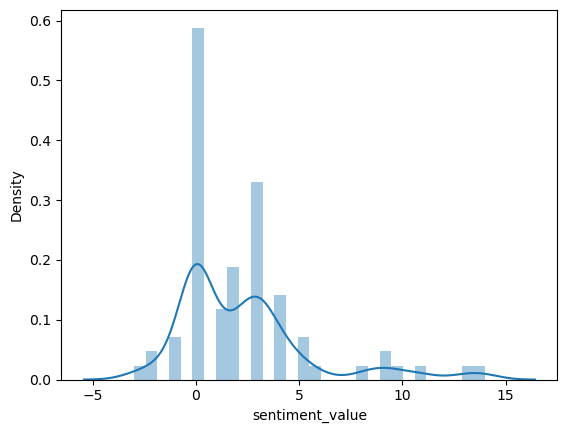

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

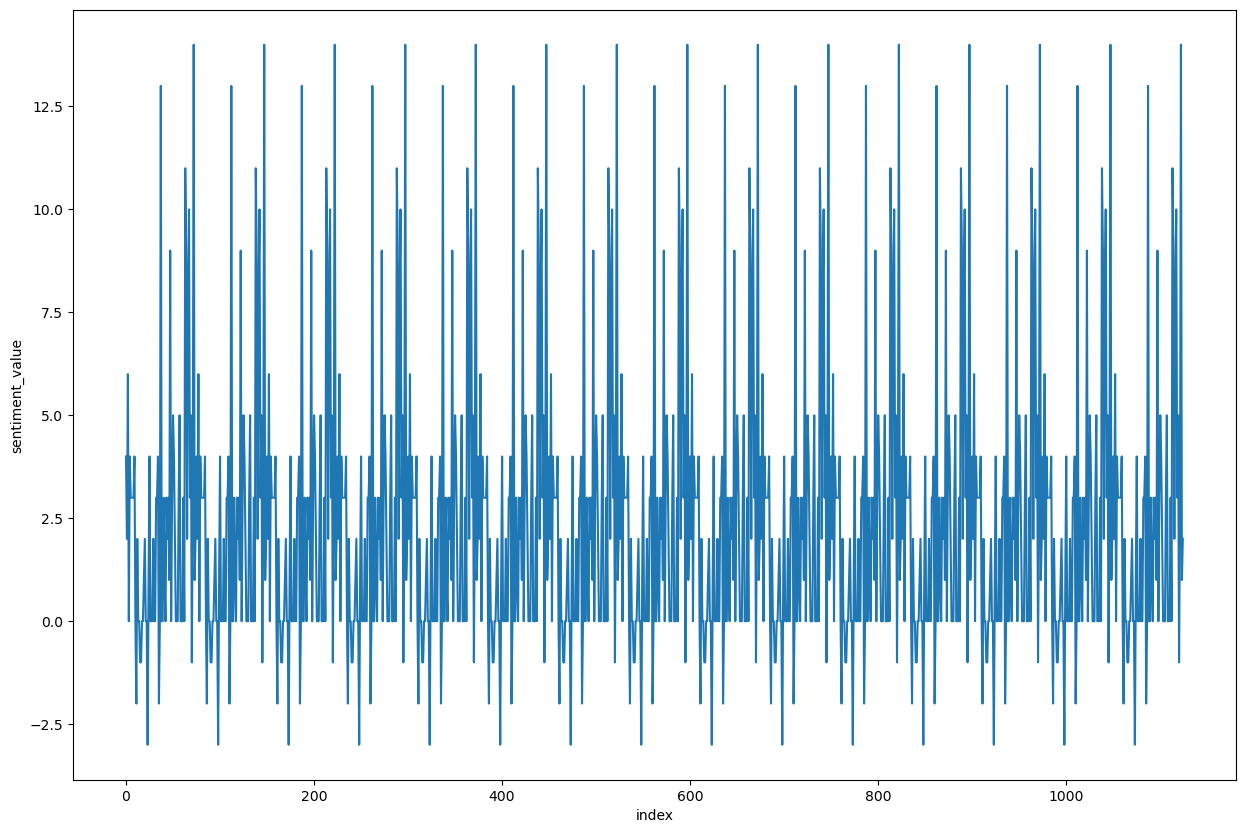

In [78]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

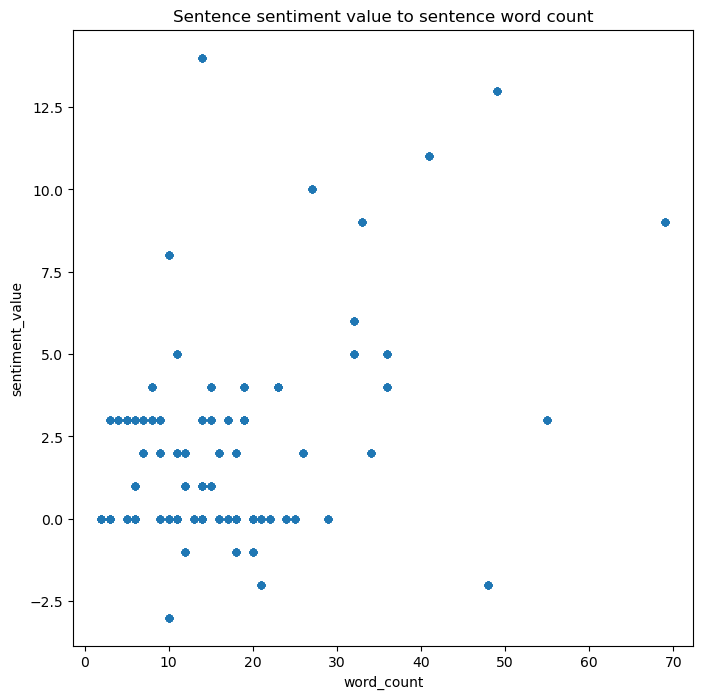

In [79]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')